<a href="https://colab.research.google.com/github/anjali-ojha/deep-learning/blob/main/assignment/assignment-2/Anjali_Ojha_HW_2_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homwwork-2 - Tensorflow

https://github.com/anjali-ojha/deep-learning/blob/main/assignment/assignment-2/Anjali_Ojha_HW_2_Tensorflow.ipynb

## Use the code provided in demo 02 to complete this assignment.

## Step 1. Follow along with the tutorial to gain an understanding of the process.

In [ ]:
%matplotlib inline

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import tensorflow as tf
from tensorflow.keras import layers, models

import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)


def create_np_data(dataset):
    loader = DataLoader(dataset)
    images_list, labels_list = [], []

    for data in loader:
        images, labels = data
        images_list.append(images.numpy())
        labels_list.append(labels.numpy())

    data_array = np.reshape(np.concatenate(images_list), (60000, 28, 28))
    label_array = np.concatenate(labels_list)
    return data_array, label_array

(train_images, train_labels) = create_np_data(train_dataset)
(test_images, test_labels) = create_np_data(test_dataset)
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = tf.one_hot(train_labels, depth=10).numpy().astype(np.float32)
test_labels_onehot = tf.one_hot(test_labels, depth=10).numpy().astype(np.float32)


In [ ]:
def show_data(data, labels):
    """
    This method shows some sample data with labels
    """
    labels_map = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        img, label = data[sample_idx], labels[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

In [ ]:
show_data(train_images, train_labels)

In [ ]:
def train_tensorflow(X_train, y_train, model, loss, optimizer, metrics, epochs, verbose=0):
    """
    This method will train the tensorflow Neural Network Model
    It takes the parameters like -
        X_train = training data
        y_train = training labels
        model = base model to train
        loss = loss function
        optmizer =  'adam' or 'SGD'
        metrics = which used to evaluate the model
        epocs  = number of iteration the moedls will be trained
        verbose = to control logs
    """
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose)

    losses = history.history['loss']
    accuracies = history.history['accuracy']

    print(f'Finished Training with Loss: {losses[-1] :.6}')
    print(f'Accuracy on Train Data: {accuracies[-1] * 100 :.5}%')

    return model, losses[-1], accuracies[-1]

In [ ]:
def evaluation(model, test_images, test_labels):
    """
    Evaluate the model with test data
    """
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    correct_predictions = np.sum(predicted_labels == test_labels)
    total_predictions = len(test_labels)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [ ]:
def show_sample_result(model, images, labels):
    """
    Show A sample test data and what is the actual and predicted labels
    """
    image, label = images[1], labels[1]
    plt.axis("off")
    plt.imshow(image.squeeze(), cmap="gray")
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    plt.title(f'Predicted Label: {predicted_labels[1]}, Actual Label: {label}')
    plt.axis('off')
    plt.show()

## Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

Epoch 1/10
1875/1875 [==============================] - 2s 884us/step - loss: 0.0308 - accuracy: 0.7858
Epoch 2/10
1875/1875 [==============================] - 2s 819us/step - loss: 0.0158 - accuracy: 0.8971
Epoch 3/10
1875/1875 [==============================] - 1s 775us/step - loss: 0.0136 - accuracy: 0.9115
Epoch 4/10
1875/1875 [==============================] - 1s 742us/step - loss: 0.0121 - accuracy: 0.9217
Epoch 5/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.0109 - accuracy: 0.9289
Epoch 6/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.0098 - accuracy: 0.9362
Epoch 7/10
1875/1875 [==============================] - 1s 743us/step - loss: 0.0089 - accuracy: 0.9429
Epoch 8/10
1875/1875 [==============================] - 1s 740us/step - loss: 0.0081 - accuracy: 0.9481
Epoch 9/10
1875/1875 [==============================] - 1s 741us/step - loss: 0.0075 - accuracy: 0.9524
Epoch 10/10
1875/1875 [==============================] - 1s 744u

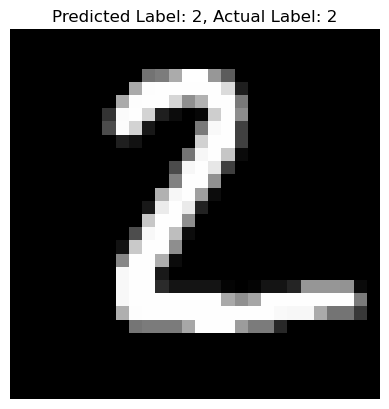

In [ ]:
"""
Base Model Architecture
"""
model = models.Sequential([
            layers.Flatten(input_shape=(28, 28)),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])


model, train_loss, train_accuracy = train_tensorflow(train_images,
                            train_labels_onehot,
                            model,
                            loss = 'mse',
                            optimizer = 'adam',
                            metrics = ['accuracy'],
                            epochs=10,
                            verbose=1)

test_accuracy = evaluation(model, test_images, test_labels)
print(f'Accuracy on Test Data: {test_accuracy * 100 :.5}%')

show_sample_result(model, test_images, test_labels)

## Step 4. Choose one of the proposed modifications below:


## HYPOTHESIS - as we are addine either new layer or make a layer wide, it can impact the performance. The Complex neural network can easily overfit the training data, but if its tuned peroperly it can increase the performance.

### 1 - Add another Dense layer of 128 nodes

Epoch 1/5
1875/1875 [==============================] - 2s 944us/step - loss: 0.0308 - accuracy: 0.7811
Epoch 2/5
1875/1875 [==============================] - 2s 939us/step - loss: 0.0148 - accuracy: 0.9029
Epoch 3/5
1875/1875 [==============================] - 2s 870us/step - loss: 0.0117 - accuracy: 0.9238
Epoch 4/5
1875/1875 [==============================] - 2s 875us/step - loss: 0.0097 - accuracy: 0.9370
Epoch 5/5
1875/1875 [==============================] - 2s 874us/step - loss: 0.0083 - accuracy: 0.9467
Finished Training with Loss: 0.00828002
Accuracy on Train Data: 94.668%
1875/1875 [==============================] - 1s 410us/step
Accuracy on Test Data: 94.215%
1875/1875 [==============================] - 1s 400us/step


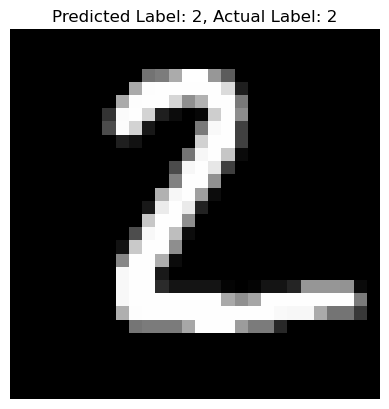

In [ ]:
"""
Added a extra layer in the model
"""
model_extra_layer = models.Sequential([
            layers.Flatten(input_shape=(28, 28)),
            layers.Dense(128, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])


model_extra_layer, _, train_accuracy = train_tensorflow(train_images,
                                                        train_labels_onehot,
                                                        model_extra_layer,
                                                        loss = 'mse',
                                                        optimizer = 'adam',
                                                        metrics = ['accuracy'],
                                                        epochs=5,
                                                        verbose=1)

test_accuracy_extra_layer = evaluation(model_extra_layer, test_images, test_labels)
print(f'Accuracy on Test Data: {test_accuracy_extra_layer * 100 :.5}%')

show_sample_result(model_extra_layer, test_images, test_labels)

### Increase the current number of nodes in the layer to 256

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0298 - accuracy: 0.7945
Epoch 2/10
1875/1875 [==============================] - 2s 998us/step - loss: 0.0149 - accuracy: 0.9023
Epoch 3/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.0128 - accuracy: 0.9162
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0113 - accuracy: 0.9261
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0100 - accuracy: 0.9346
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0088 - accuracy: 0.9441
Epoch 7/10
1875/1875 [==============================] - 2s 992us/step - loss: 0.0078 - accuracy: 0.9503
Epoch 8/10
1875/1875 [==============================] - 2s 993us/step - loss: 0.0070 - accuracy: 0.9556
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0063 - accuracy: 0.9601
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - los

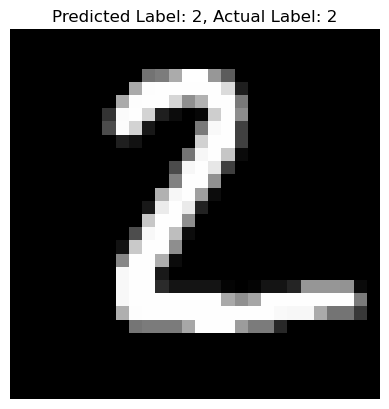

In [ ]:
"""
Make a exisitng layer wide
"""
model_wide_layer = models.Sequential([
            layers.Flatten(input_shape=(28, 28)),
            layers.Dense(256, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])


model_wide_layer, _, train_accuracy_wide = train_tensorflow(train_images,
                                                            train_labels_onehot,
                                                            model_wide_layer,
                                                            loss = 'mse',
                                                            optimizer = 'adam',
                                                            metrics = ['accuracy'],
                                                            epochs=10,
                                                            verbose=1)

test_accuracy_wide_layer = evaluation(model_wide_layer, test_images, test_labels)
print(f'Accuracy on Test Data: {test_accuracy_wide_layer * 100 :.5}%')

show_sample_result(model_wide_layer, test_images, test_labels)

## Step 6. Report on the results of the modified model and if it matches your hypothesis

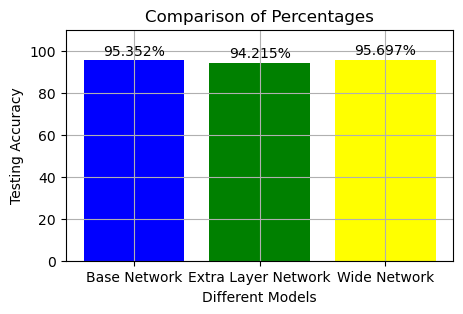

In [ ]:
"""
Performance Comparisions for the differnet models
"""
labels = ['Base Network', 'Extra Layer Network', 'Wide Network']
values = [test_accuracy*100, test_accuracy_extra_layer*100, test_accuracy_wide_layer*100]

plt.figure(figsize=(5, 3))
bars = plt.bar(labels, values, color=['blue', 'green', 'yellow'])

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.3f}%', ha='center', va='bottom')

plt.ylim(0, 110)
plt.title('Comparison of Percentages')
plt.xlabel('Different Models')
plt.ylabel('Testing Accuracy')
plt.grid(True)

# Show the plot
plt.show()

## Observation

* From the bar chart its clear that all three models works great and achieving more than 92% test accuracy.
* But we can also see that wide layer models works with best accuracy, but the  model with extra layer performs worse than the base model hinting towards the overfitting.
* If we rerun the training it will change, because of different intialization so we need more epochs  for any conclusion.
* But we can clearly say that the wide network works best, and extra layer make it complex which is decreaseing the performance, and it verifies the hypothesis.

## Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [ ]:
"""
Defining a model class which have a variable dropout and activation functions.
So that we can measure the performance for each of the model
"""
def MLP_Flex(activation_function, dropout):
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation=activation_function),
        layers.Dropout(dropout),
        layers.Dense(64, activation=activation_function),
        layers.Dropout(dropout),
        layers.Dense(10, activation=activation_function)
    ])

In [ ]:
optimizers = ['adam', 'sgd', 'rmsprop']
loss_functions = ['mse', 'huber']
dropouts = [0.0, 0.2, 0.5]
activation_functions = ['relu', 'sigmoid']

result = {"optimizer":[], "loss": [], "dropout":[], "activation": [],
          "training_loss": [], "train_accuracy": [], "test_accuracy": [], "name": []}

for optimizer in optimizers:
    for loss_function in loss_functions:
        for dropout in dropouts:
            for activation_function in activation_functions:

                result["optimizer"].append(optimizer)
                result["loss"].append(loss_function)
                result["activation"].append(activation_function)
                result["dropout"].append(dropout)

                name = []
                for key in ["optimizer", "loss", "activation", "dropout"]:
                    name.append(f'{key}={result[key][-1]}')

                result["name"].append(",".join(name))

                print(f'''\n\tTraining {result["name"][-1]}''')

                model = MLP_Flex(activation_function=activation_function, dropout=dropout)

                model, training_loss, train_accuracy = train_tensorflow(train_images,
                                                                        train_labels_onehot,
                                                                        model,
                                                                        loss = loss_function,
                                                                        optimizer = optimizer,
                                                                        metrics = ['accuracy'],
                                                                        epochs=5,
                                                                        verbose=0)

                result["train_accuracy"].append(train_accuracy*100)
                result["training_loss"].append(training_loss)

                test_accuracy = evaluation(model, test_images, test_labels)
                result["test_accuracy"].append(test_accuracy*100)
                print(f'Accuracy on Test Data: {test_accuracy * 100 :.5}%')




	Training optimizer=adam,loss=mse,activation=relu,dropout=0.0
Finished Training with Loss: 0.0375038
Accuracy on Train Data: 65.685%
1875/1875 [==============================] - 1s 426us/step
Accuracy on Test Data: 65.51%

	Training optimizer=adam,loss=mse,activation=sigmoid,dropout=0.0
Finished Training with Loss: 0.0238603
Accuracy on Train Data: 87.228%
1875/1875 [==============================] - 1s 453us/step
Accuracy on Test Data: 88.027%

	Training optimizer=adam,loss=mse,activation=relu,dropout=0.2
Finished Training with Loss: 0.0106494
Accuracy on Train Data: 94.258%
1875/1875 [==============================] - 1s 421us/step
Accuracy on Test Data: 95.173%

	Training optimizer=adam,loss=mse,activation=sigmoid,dropout=0.2
Finished Training with Loss: 0.0385146
Accuracy on Train Data: 74.393%
1875/1875 [==============================] - 1s 421us/step
Accuracy on Test Data: 82.337%

	Training optimizer=adam,loss=mse,activation=relu,dropout=0.5
Finished Training with Loss: 0.02034

In [ ]:
result_df = pd.DataFrame(result)
result_df

,optimizer,loss,dropout,activation,training_loss,train_accuracy,test_accuracy,name
0,adam,mse,0.0,relu,0.037504,65.684998,65.510000,"optimizer=adam,loss=mse,activation=relu,dropou..."
1,adam,mse,0.0,sigmoid,0.023860,87.228334,88.026667,"optimizer=adam,loss=mse,activation=sigmoid,dro..."
2,adam,mse,0.2,relu,0.010649,94.258332,95.173333,"optimizer=adam,loss=mse,activation=relu,dropou..."
3,adam,mse,0.2,sigmoid,0.038515,74.393332,82.336667,"optimizer=adam,loss=mse,activation=sigmoid,dro..."
4,adam,mse,0.5,relu,0.020341,88.681668,92.105000,"optimizer=adam,loss=mse,activation=relu,dropou..."
5,adam,mse,0.5,sigmoid,0.061499,52.456665,68.143333,"optimizer=adam,loss=mse,activation=sigmoid,dro..."
6,adam,huber,0.0,relu,0.013150,85.315001,85.920000,"optimizer=adam,loss=huber,activation=relu,drop..."
7,adam,huber,0.0,sigmoid,0.013307,85.133332,85.985000,"optimizer=adam,loss=huber,activation=sigmoid,d..."
8,adam,huber,0.2,relu,0.009977,84.836668,85.838333,"optimizer=adam,loss=huber,activation=relu,drop..."
9,adam,huber,0.2,sigmoid,0.021999,70.005000,80.086667,"optimizer=adam,loss=huber,activation=sigmoid,d..."


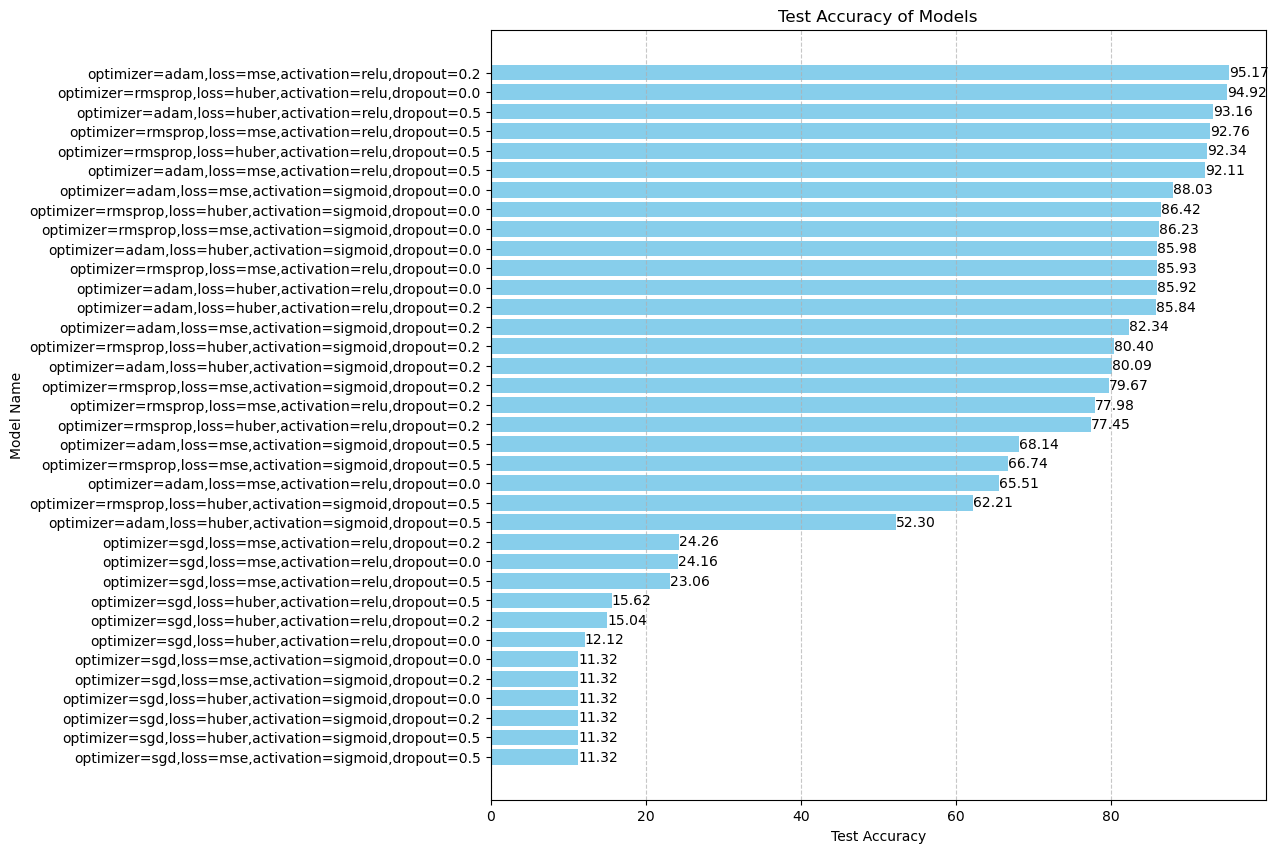

In [ ]:
"""
Sort DataFrame by Test_Accuracy in increasing order and plot it for different models
"""

df_sorted = result_df.sort_values(by='test_accuracy')

plt.figure(figsize=(10, 10))
bars = plt.barh(df_sorted['name'], df_sorted['test_accuracy'], color='skyblue')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)
plt.xlabel('Test Accuracy')
plt.ylabel('Model Name')
plt.title('Test Accuracy of Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Observations -

* We can see that some of the hyper parameters are working as great and have accuracy very close to each other.
* Increaseing value of dropout more than 0.2 is not helping.
* but the some combinations are not working as expected, but SGD optmizer is not working as comparable to other otimizers.
* Adam Optimizer and RMS Prop is working consistently good, but SGD (Schtocastic Gradient Descent) is not working well.
* as we are training our models for 5 epochs, so increasing the epochs will also increase the model performance. We can see the below results which verifies the claim.


In [ ]:
optimizers = ['sgd']
loss_functions = ['huber']
dropouts = [0.0]
activation_functions = ['relu']

result = {"optimizer":[], "loss": [], "dropout":[], "activation": [],
          "training_loss": [], "train_accuracy": [], "test_accuracy": [], "name": []}

for optimizer in optimizers:
    for loss_function in loss_functions:
        for dropout in dropouts:
            for activation_function in activation_functions:

                result["optimizer"].append(optimizer)
                result["loss"].append(loss_function)
                result["activation"].append(activation_function)
                result["dropout"].append(dropout)

                name = []
                for key in ["optimizer", "loss", "activation", "dropout"]:
                    name.append(f'{key}={result[key][-1]}')

                result["name"].append(",".join(name))

                print(f'''\n\tTraining {result["name"][-1]}''')

                model = MLP_Flex(activation_function=activation_function, dropout=dropout)

                model, training_loss, train_accuracy = train_tensorflow(train_images,
                                                                        train_labels_onehot,
                                                                        model,
                                                                        loss = loss_function,
                                                                        optimizer = optimizer,
                                                                        metrics = ['accuracy'],
                                                                        epochs=40,
                                                                        verbose=0)

                result["train_accuracy"].append(train_accuracy*100)
                result["training_loss"].append(training_loss)

                test_accuracy = evaluation(model, test_images, test_labels)
                result["test_accuracy"].append(test_accuracy*100)
                print(f'Accuracy on Test Data: {test_accuracy * 100 :.5}%')




	Training optimizer=sgd,loss=huber,activation=relu,dropout=0.0
Finished Training with Loss: 0.0453565
Accuracy on Train Data: 27.983%
1875/1875 [==============================] - 1s 399us/step
Accuracy on Test Data: 25.695%


### We can see that as the epochs increases the accuracy increases.
